# Iterative Closest Point (ICP) 

# by.. Worasuchad Haomachai 60340700008

Mobile Robot Class at FIBO

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PLOT = True
EXCEPT = 0.001
MAXITER = 100

In [3]:
def ICP(P, Q):
    
    dError = 1000
    preError = 1000
    count = 0

    while dError >= EXCEPT:
        count += 1

        if PLOT:
            plt.cla()
            plt.plot(P[:, 0], P[:, 1], ".m")
            plt.plot(Q[:, 0], Q[:, 1], ".c")
            plt.plot(0.0, 0.0, "xr")
            plt.axis("equal")
            plt.pause(1.0)
            
        qHat = NearestNeighbor(P, Q)

        Mu_P = sum(P[:,:])/P.shape[0]
        Mu_Q = sum(qHat[:,:])/qHat.shape[0]
        
        pShift = P - Mu_P
        qShift = qHat - Mu_Q
        
        W = pShift.T.dot(qShift)
        U, S, V = np.linalg.svd(W)
        R = U.dot(V.T)
        T = Mu_P - R.dot(Mu_Q)
        
        Q = Q.dot(R.T) + T.T
        
        E = P - Q
        d = np.linalg.norm(E, axis=0)
        error = sum(d)
        
        dError = abs(preError - error)
        preError = error
        print("Error:", dError)
        
        if dError <= EXCEPT:
            print("Converge", dError, count)
            break
        elif MAXITER <= count:
            print("Not Converge", dError, count)
            break


In [4]:
def NearestNeighbor(P, Q):
    qHat = []
    qHat0 = []
    qHat1 = []
    
    for i in range(Q.shape[0]):
        minId = -1
        minD = float("inf")
        for j in range(P.shape[0]):
            d = np.linalg.norm(P[i, :] - Q[j, :])

            if minD >= d:
                minD = d
                minId = j

        qHat0.append(Q[minId,0])
        qHat1.append(Q[minId,1])
        qHat = np.stack((qHat0, qHat1), axis = 1)

    return qHat

In [5]:
def main():
    print("Going to matching!!")
    n = 1  # number of running

    for _ in range(n):
        P = np.loadtxt("laser_A.txt", delimiter=" ")
        Q = np.loadtxt("laser_B.txt", delimiter=" ")
        ICP(P, Q)

Going to matching!!


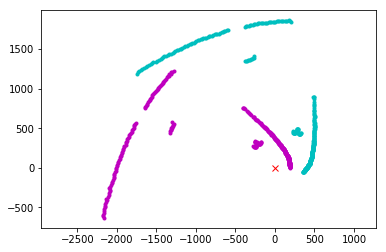

('Error:', 34455.16595307369)


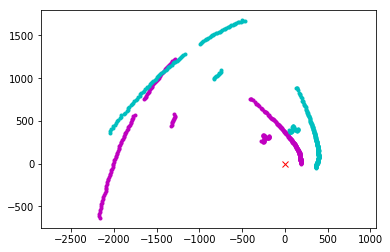

('Error:', 1343.083141907504)


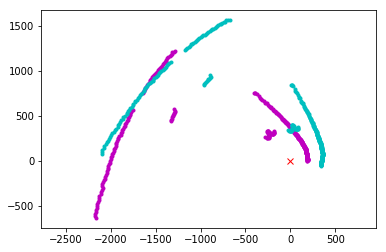

('Error:', 803.4448290192377)


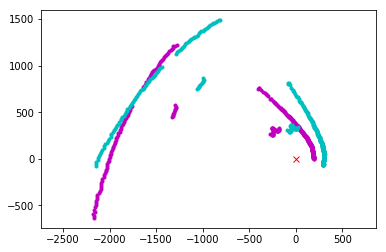

('Error:', 546.5863053227586)


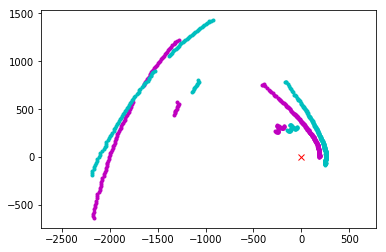

('Error:', 339.02209782699356)


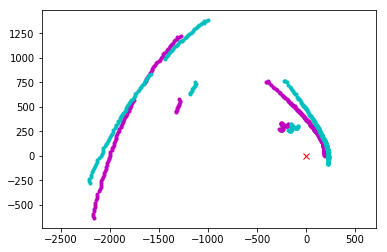

('Error:', 219.23422269047296)


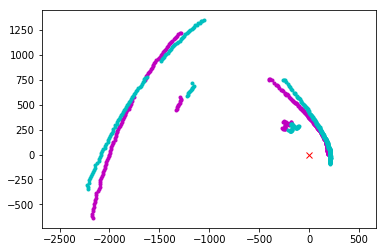

('Error:', 160.12756808990525)


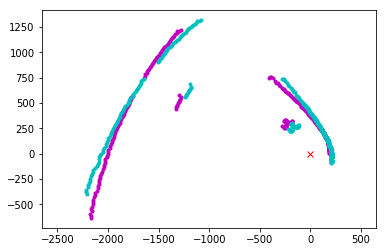

('Error:', 120.39218661276027)


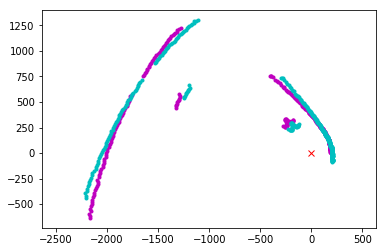

('Error:', 101.0029713048607)


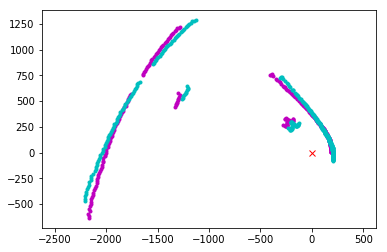

('Error:', 74.8338541057019)


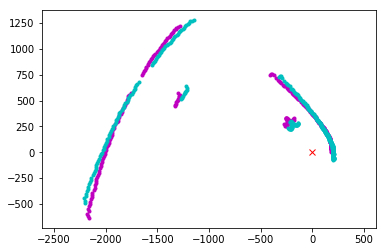

('Error:', 62.16961763834115)


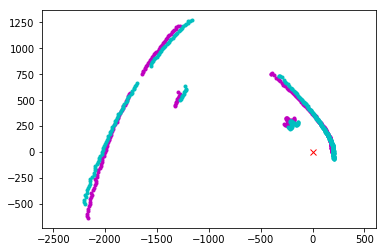

('Error:', 59.864782906428445)


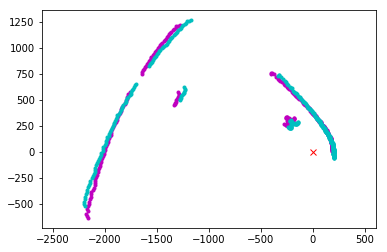

('Error:', 57.381119419209426)


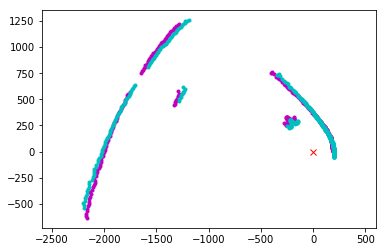

('Error:', 44.415720757009694)


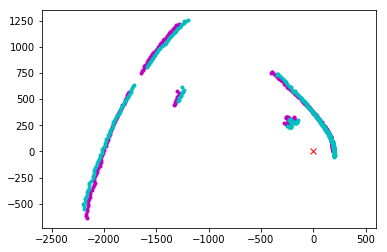

In [ ]:
if __name__ == '__main__':
    main()